In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploded['Mall_Customers.csv']))
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df["A"]= df[["Annual Income (k$)"]]
df["B"]=df[["Spending Score (1-100)"]]

In [ ]:
X=df[["A","B"]]
X.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# %matplotlib inline


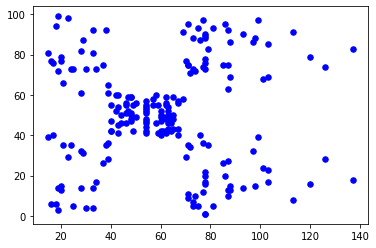

In [ ]:
plt.scatter(X["A"], X["B"], s = 30, c = 'b')
plt.show()

In [ ]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(n_clusters=5)

In [ ]:

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [ ]:
clusters = Kmean.fit_predict(X)
df["label"] = clusters
df.head(100)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,2
1,2,Male,21,15,81,15,81,1
2,3,Female,20,16,6,16,6,2
3,4,Female,23,16,77,16,77,1
4,5,Female,31,17,40,17,40,2
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,0
96,97,Female,47,60,47,60,47,0
97,98,Female,27,60,50,60,50,0
98,99,Male,48,61,42,61,42,0


In [ ]:
col=['green','blue','black','yellow','orange',]

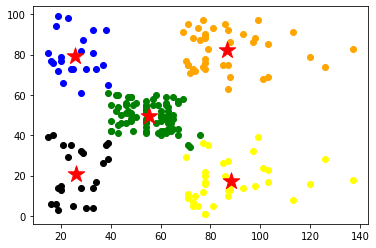

In [ ]:
for i in range(5):
    a=col[i]
    # print(a)
    plt.scatter(df.A[df.label==i], df.B[df.label == i], c=a, label='cluster 1')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300,
                c='r', label='centroid')

In [ ]:
X1 = X.loc[:,["A","B"]].values

In [ ]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize =( 12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

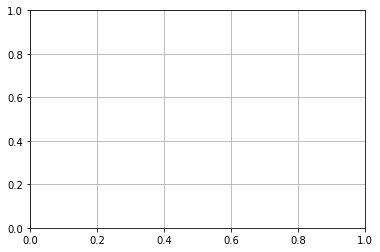

In [ ]:
plt.grid()

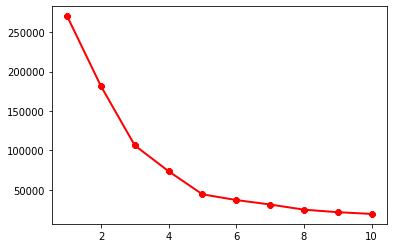

In [ ]:
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")

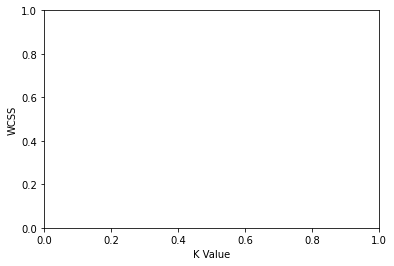

In [ ]:
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

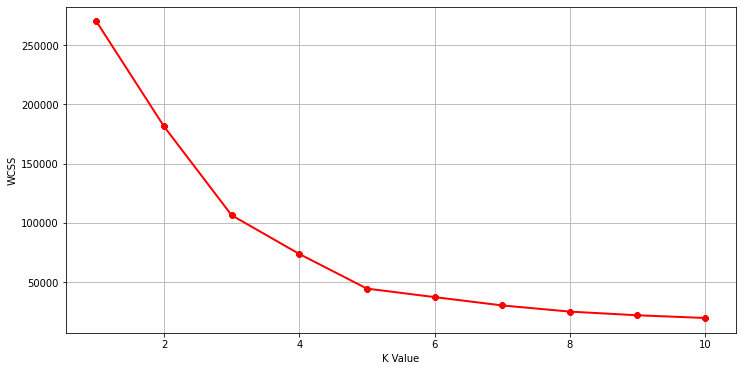

In [ ]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()
